In [ ]:
!pip install rioxarray
!pip install geopandas
!pip install earthpy

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /root/earth-analytics/data/cold-springs-fire/.


In [7]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

naip_data.shape

(4, 2312, 4377)

In [8]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

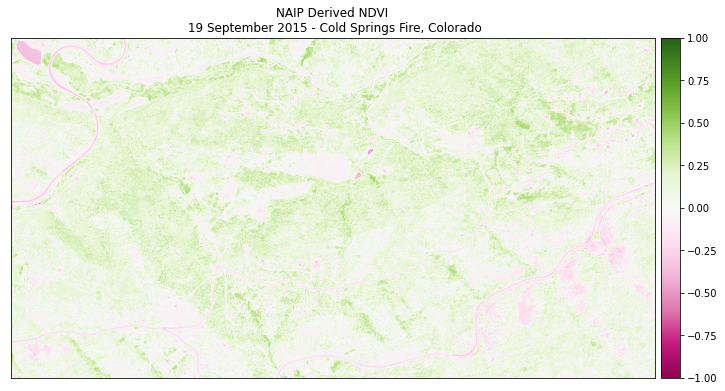

In [9]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

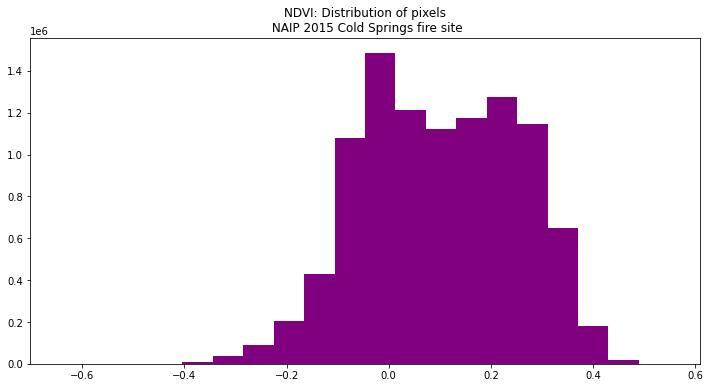

In [10]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

In [13]:
#Export GeoTiff
type(naip_ndvi), naip_ndvi.dtype

naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

# Write your the ndvi raster object
naip_ndvi.rio.to_raster(naip_ndvi_outpath)